# Project Description

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

**Step 4. Exploratory Data Analysis**

In [9]:
# Import python libraries and packages relevant to project
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 
from scipy.stats import levene
from scipy.stats import f as f_test


In [21]:
# Load the datasets
df_1 = pd.read_csv('data_1.csv')
df_2 = pd.read_csv('data_2.csv')

In [23]:
# Read dataframe #1
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [25]:
df_1.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


**Data Description For DataFrame 1**

- Taxi company name
- The number of rides for each taxi company on November 15-16, 2017.

In [28]:
df_1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [30]:
# Read dataframe #2
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [32]:
df_2.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


**Data Description For DataFrame 2**
- Chicago neighborhoods where rides ended
- The average number of rides that ended in each neighborhood in November 2017

In [35]:
df_2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [37]:
# Rounding average_trips in df_2 to the nearest whole number
df_2 = df_2.round(0)
df_2.info

<bound method DataFrame.info of    dropoff_location_name  average_trips
0                   Loop        10727.0
1            River North         9524.0
2          Streeterville         6665.0
3              West Loop         5164.0
4                 O'Hare         2547.0
..                   ...            ...
89       Mount Greenwood            3.0
90             Hegewisch            3.0
91              Burnside            2.0
92             East Side            2.0
93             Riverdale            2.0

[94 rows x 2 columns]>

In [39]:
# Checking for missing values
df_1.isnull().sum()

company_name    0
trips_amount    0
dtype: int64

In [41]:
df_2.isnull().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [43]:
# Checking for duplicate rows
df_1.duplicated().sum()

0

In [45]:
df_2.duplicated().sum()

0

In [47]:
# Identifying the top 10 neighborhoods by number of drop-offs
top_10 = df_2.sort_values(by=['average_trips'], ascending = False).head(10)
top_10.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.0
1,River North,9524.0
2,Streeterville,6665.0
3,West Loop,5164.0
4,O'Hare,2547.0
5,Lake View,2421.0
6,Grant Park,2069.0
7,Museum Campus,1510.0
8,Gold Coast,1364.0
9,Sheffield & DePaul,1260.0


**Top 10 Neighborhoods by Number of Drop-offs**

1. Loop
2. River North
3. Streeterville
4. West Loop
5. O'Hare
6. Lake View
7. Grant Park
8. Museum Campus
9. Gold Coast
10. Sheffield & Paul

In [50]:
# Sorting company_names by trips amount
top_rides = df_1.sort_values(by=['trips_amount'], ascending = False).head(10)
top_rides.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


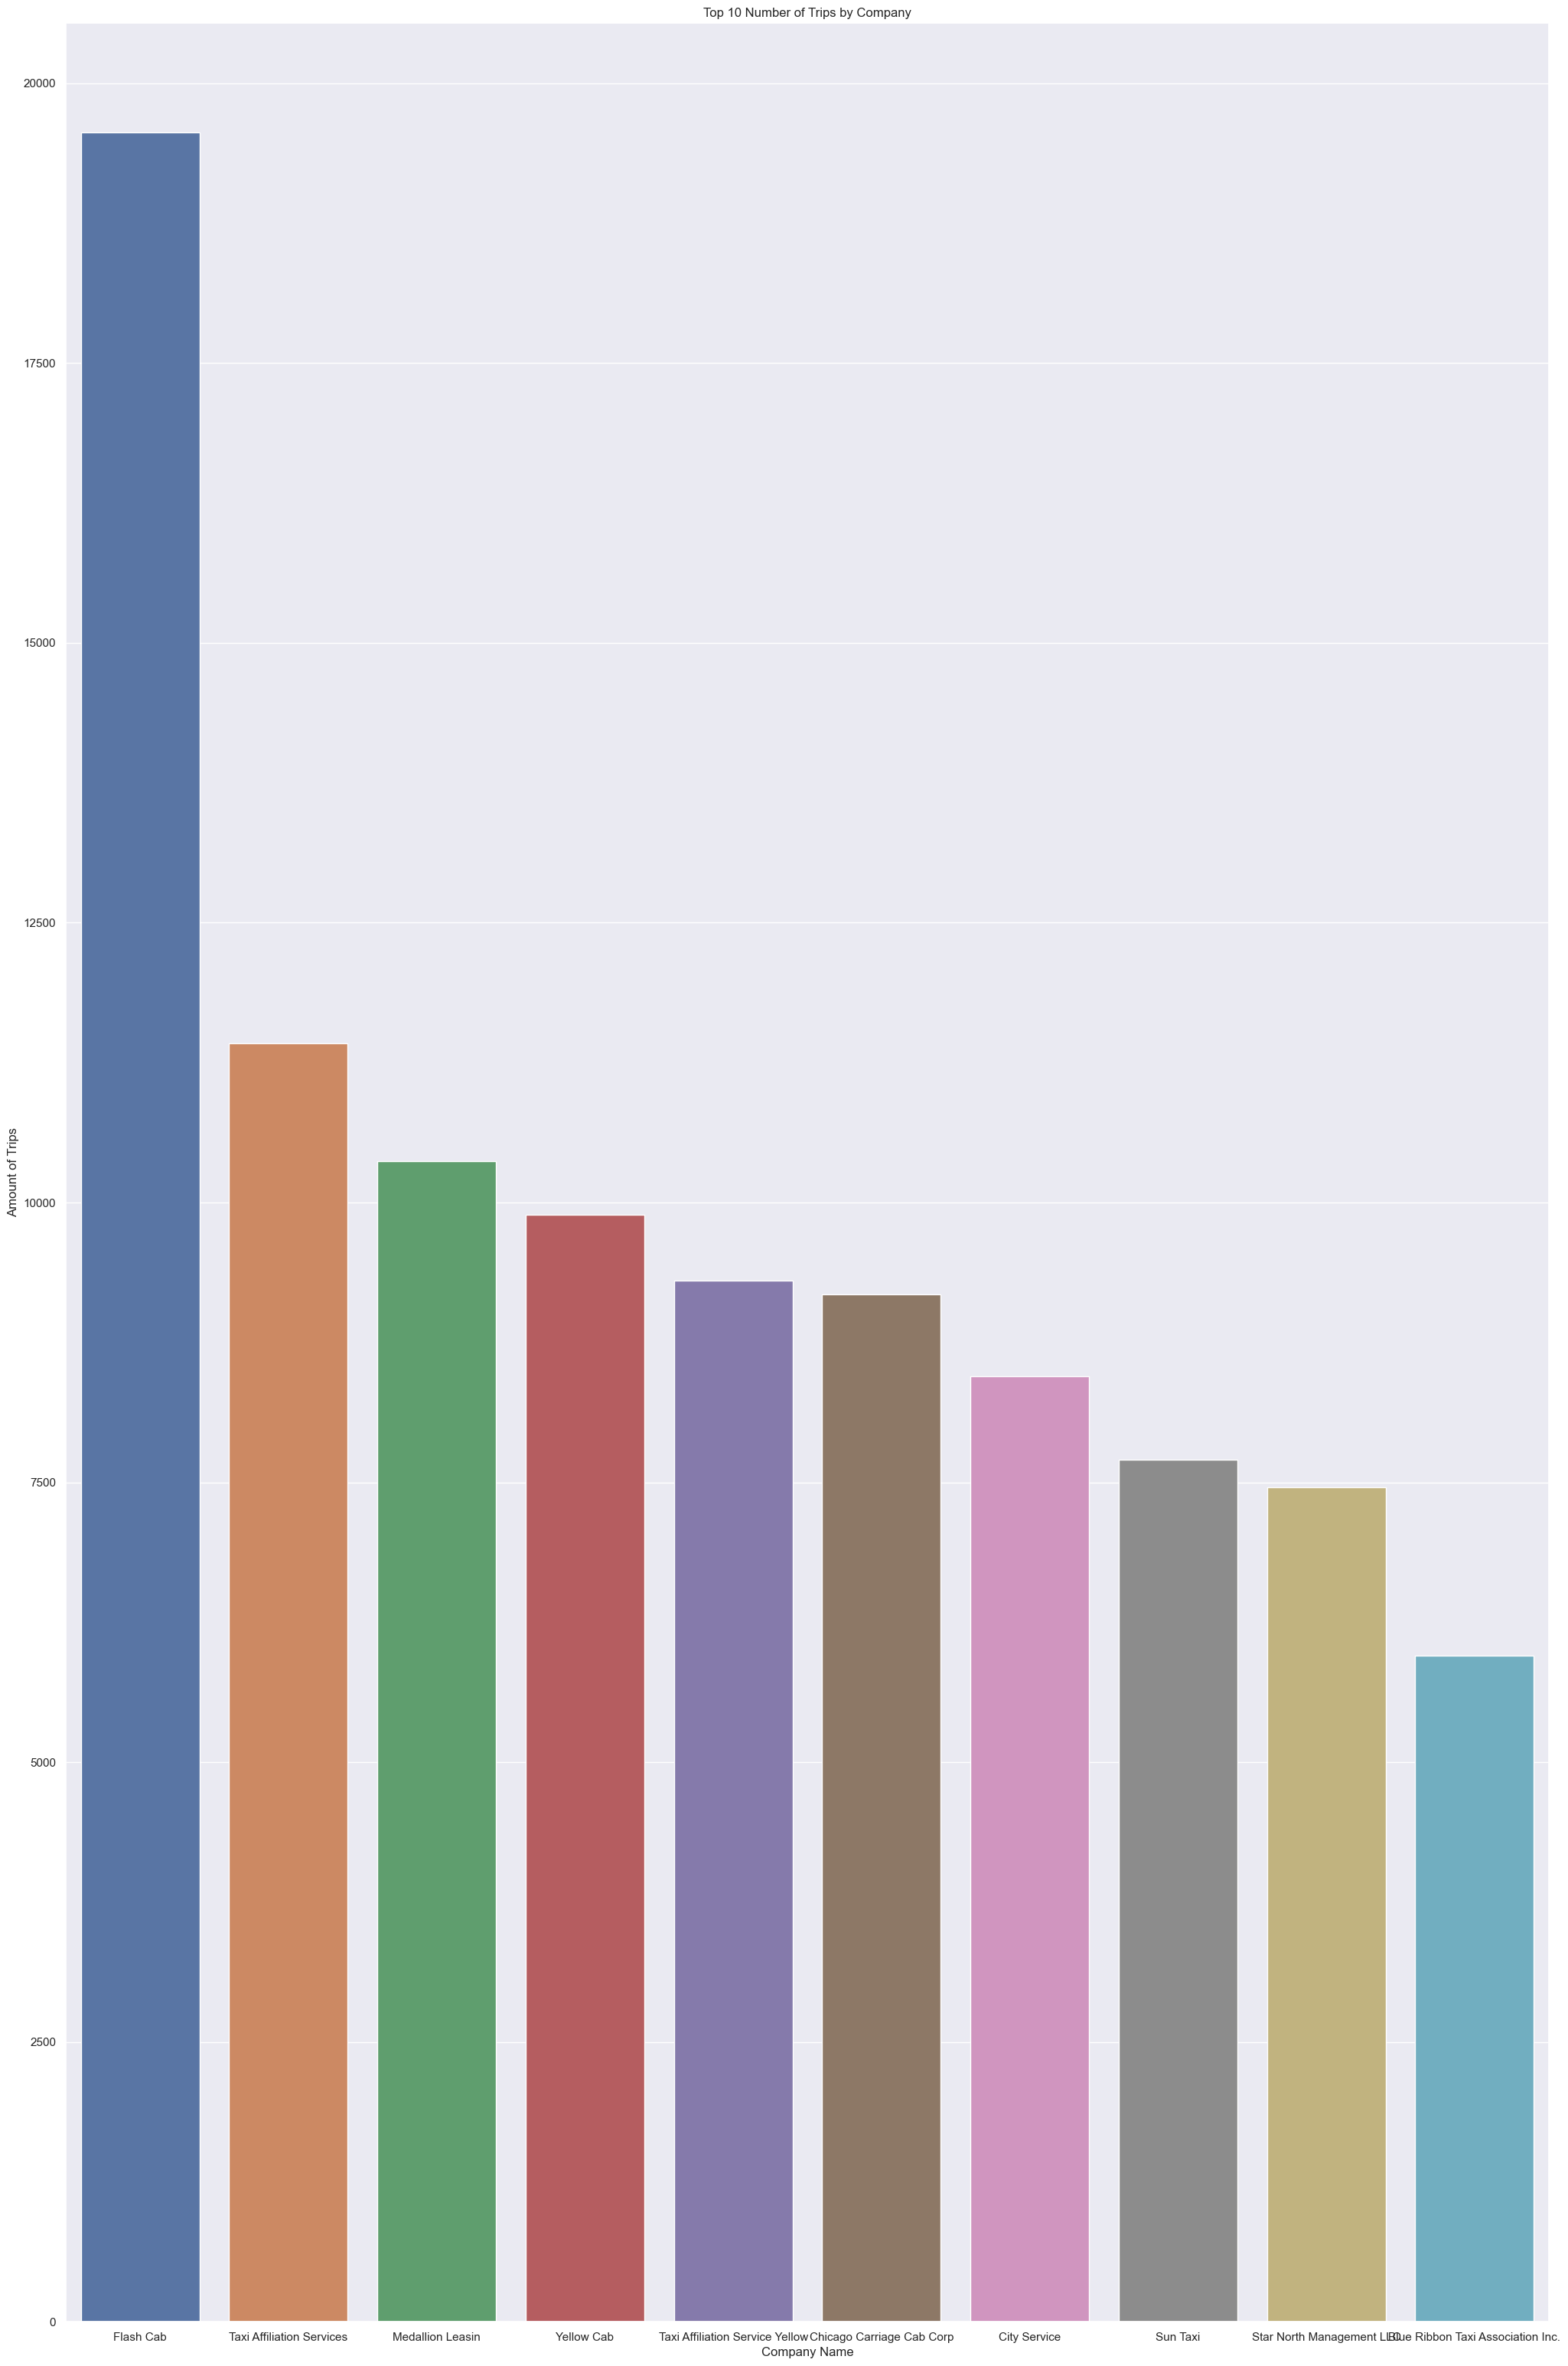

In [78]:
# Graphing the Top 10 Cab Companies by Number of Rides
sns.barplot(data=top_rides, x='company_name', y='trips_amount').set(title='Top 10 Number of Trips by Company', xlabel='Company Name', ylabel='Amount of Trips')
sns.set(rc={'figure.figsize':(25,45)})
plt.show()

**Conclusion 1**

As we can see from the graph above, the Flash Cab cab company has almost double the amount of trips as the next highest company from November 15-16, 2017. The next highest, Taxi Affiliation Services, is 2nd overall and begins a steady decline in order from 2nd to 10th overall. Relatively, the 2nd ranked cab company by number of trips is about double that of the 10th, coming in at 1142 to 5953, respectively.  

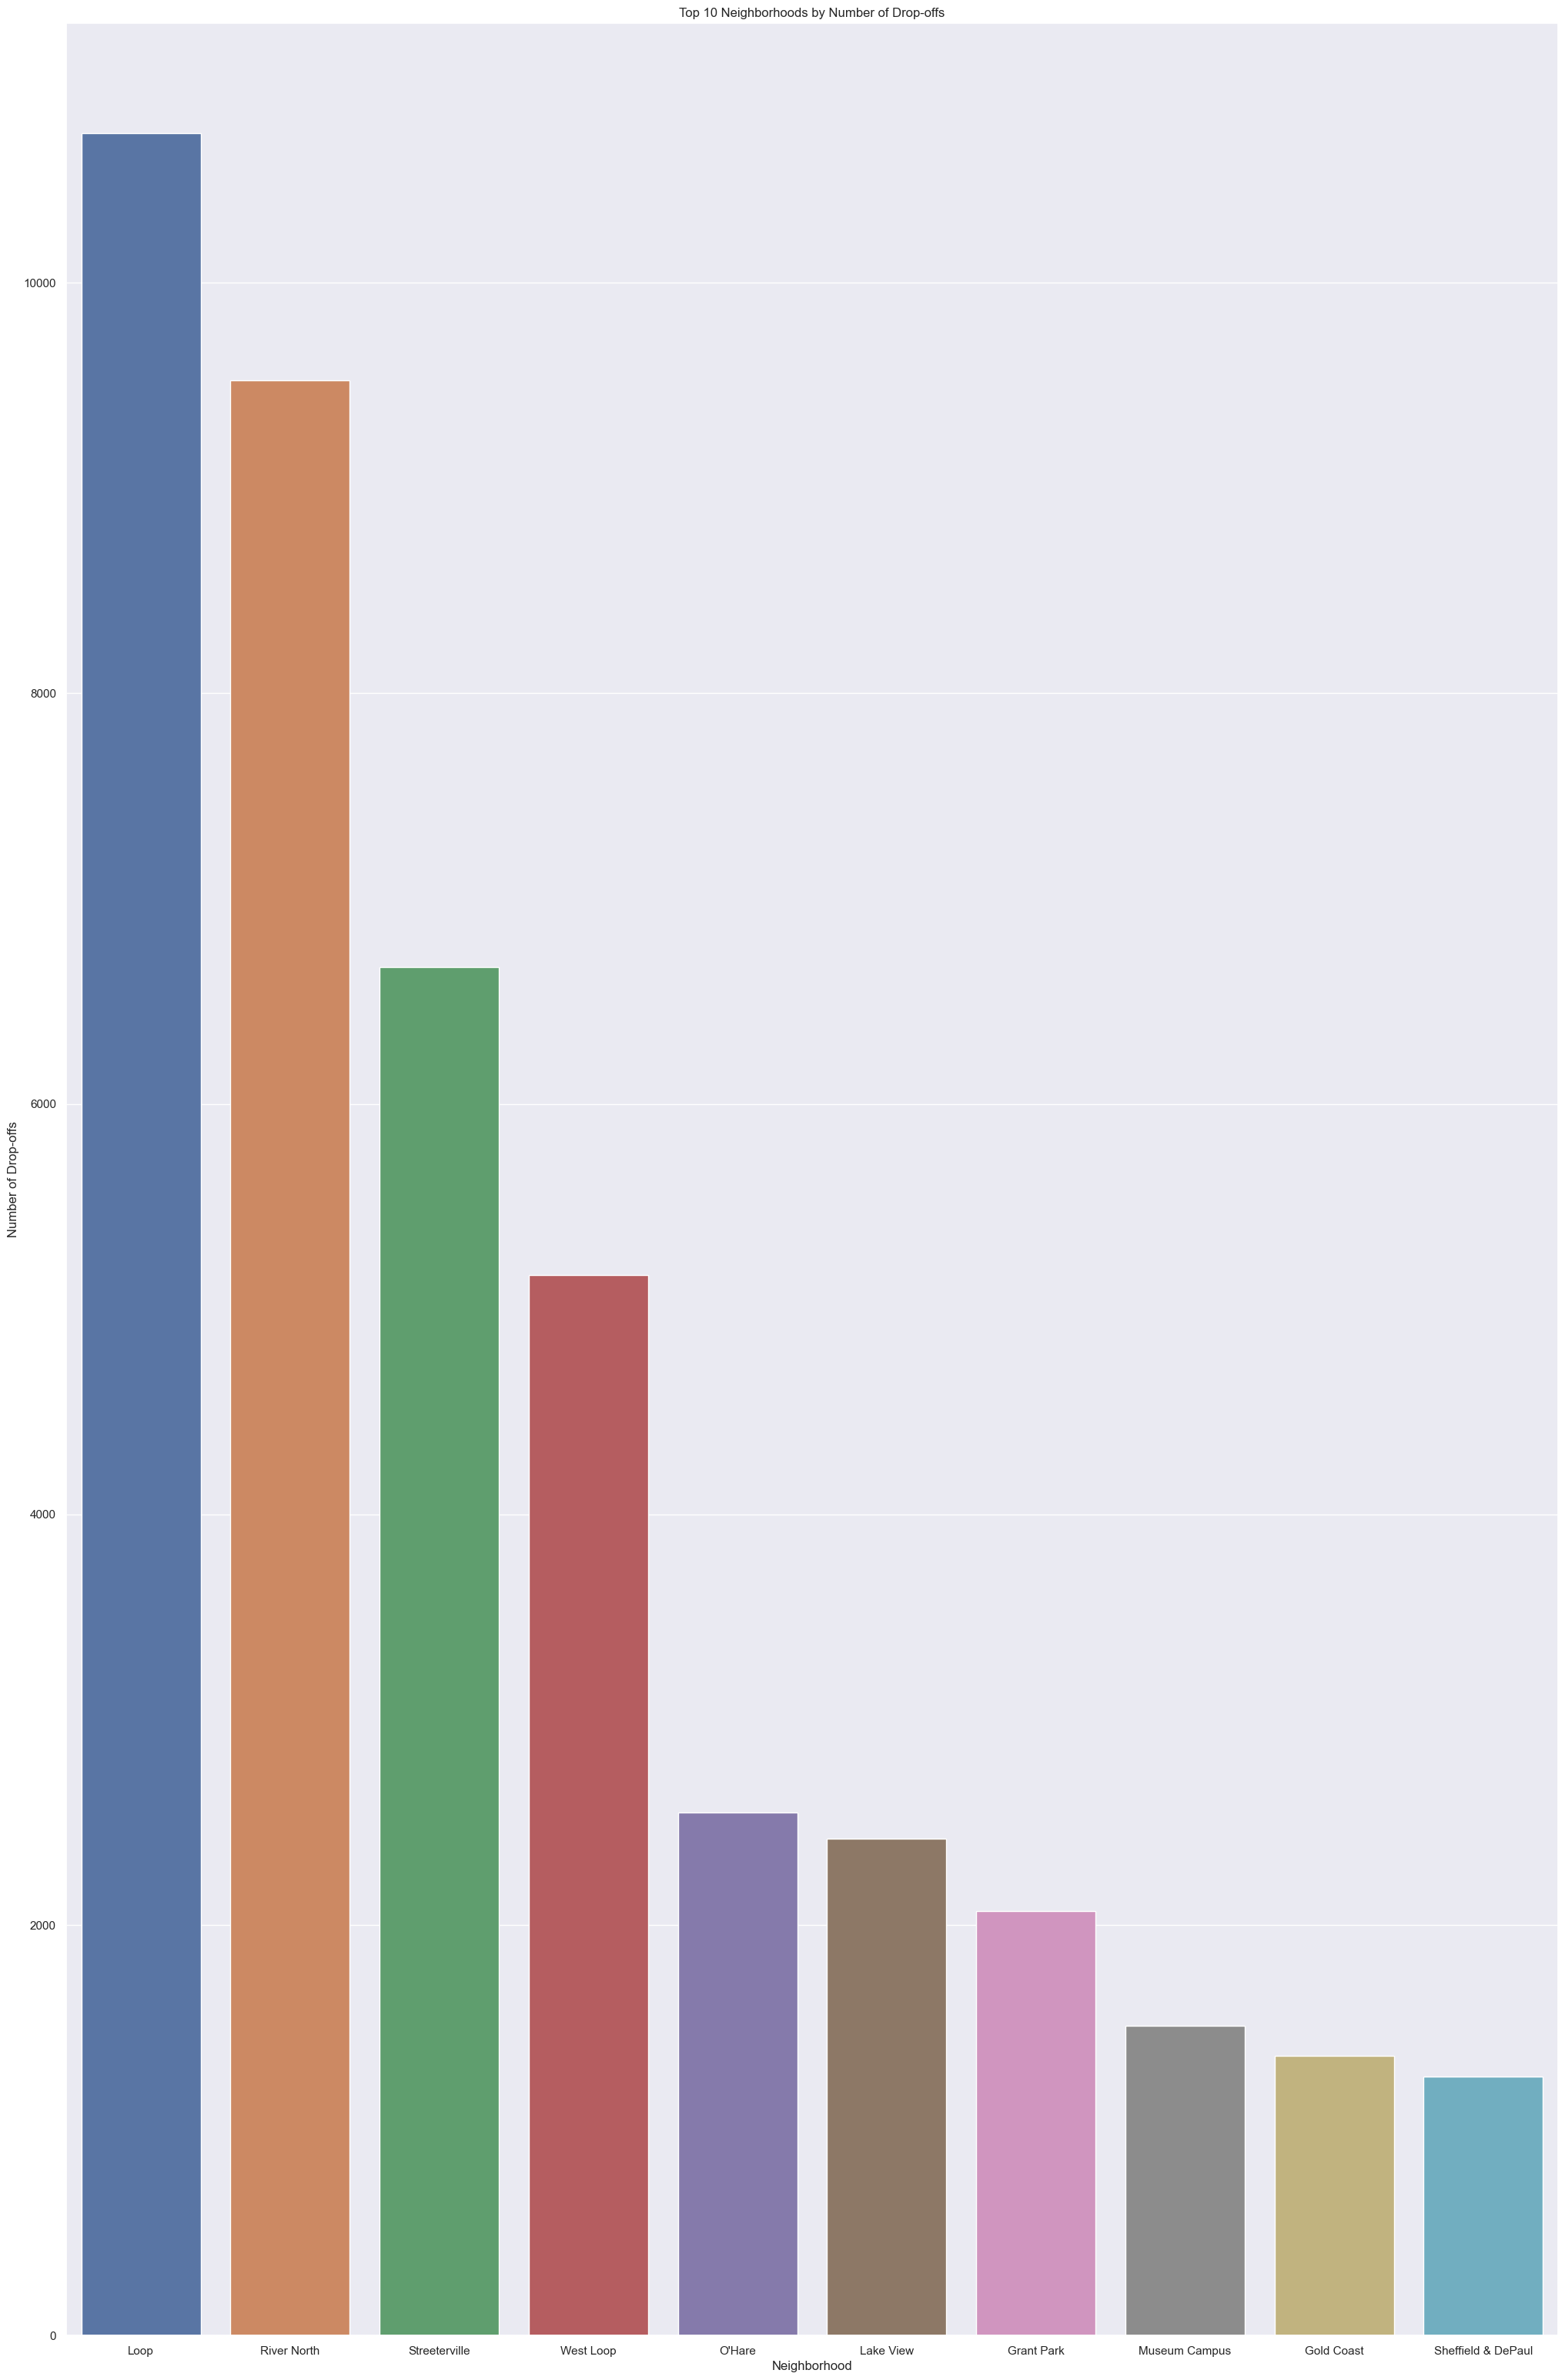

In [82]:
# Graphing the Top 10 Neighborhoods by Number of Drop-offs
sns.barplot(data=top_10, x='dropoff_location_name', y='average_trips').set(title='Top 10 Neighborhoods by Number of Drop-offs', xlabel='Neighborhood', ylabel='Number of Drop-offs')
plt.show()

**Conclusion 2**

The top 2 neighborhoods by drop-offs, Loop & River North, are hovering close to 10,000 average trips during November of 2017. There is a sharp decline after that, with No. 3 Streeterville at 6665 and No. 4 West Loop at 5164. The bottom 6 neighborhoods are all less than half of West Loop by number of total drop-offs in the month of November. It is a top heavy graph in terms of neighborhood by drop off. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Top taxi companies and dropoff locations were identified successfully!

</div>

**Step 5. Testing Hypothesis**

In [91]:
# Load the Dataset
df_3 = pd.read_csv('data_3.csv')

In [93]:
# Read the DataFrame
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [95]:
df_3.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [97]:
df_3.head(10)

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


**Data Description For DataFrame 3**

1. Pickup date and time
2. Weather conditions at the moment the ride started
3. Ride duration in seconds

In [99]:
# Checking for missing values
df_3.isnull().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [101]:
# Checking for duplicate rows 
df_3.duplicated().sum()

197

In [103]:
# Convert start_ts (pickup date and time) from to datetime data type
df_3['start_ts']= pd.to_datetime(df_3['start_ts'])
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [105]:
# Counting the total number of rainy days
df_3_grouped = df_3.groupby('weather_conditions')['duration_seconds'].count()
df_3_grouped.head(10)

weather_conditions
Bad     180
Good    888
Name: duration_seconds, dtype: int64

In [26]:
# Hypothesis Testing - Test the Hypothesis "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays"
# Ho: The average duration of rides from the Loop to O'Hare Intl Airport does not change on rainy Saturdays.
# H1: Average duration of rides does change on rainy Saturdays.

df_3_bad = df_3[df_3['weather_conditions'] == 'Bad']['duration_seconds']
df_3_good = df_3[df_3['weather_conditions'] == 'Good']['duration_seconds']

alpha = .05

results = st.ttest_ind(df_3_bad, df_3_good)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


**Summary of Hypothesis Test**

With such a low p-value, we reject the null hypothesis that the mean duration of rides doesn't change on rainy saturdays. In fact, the mean duration of rides between these two locations on rainy saturdays is higher.

**Conclusion**

- The majority of taxi rides are given by the top 2 companies in Chicago. 
- The majority of drop-off locations are all concentrated in the top 4 drop-off locations. This could be explained by the higher population in those areas, given that they are all located in the city downtown.
- During the month of November, weather conditions impact the mean duration of rides on Saturdays.
    - Bad weather conditions led to an increased duration of rides. This may be explained by slower traffic during bad weather conditions, as cars drive slower. It may also be explained by more cars being on the road during bad weather conditions, which may cause less people to use walking, biking, and public transit. 

